In [59]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import numpy.linalg as LA

### a)

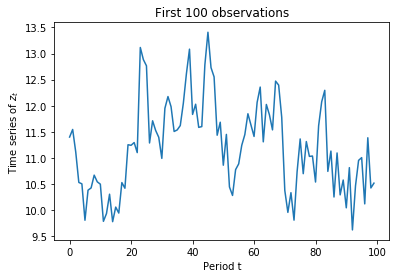

In [60]:
T = 500
sigma = 0.7
mu= 11.4
rho = 0.85
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

z = np.zeros(T)
for i in range(T):
    if i == 0:
        z[i] = mu
    else:
        z[i] = rho * z[i-1] + (1- rho) * mu + eps_vec[i]
        
plt.plot(z[:100])
plt.title("First 100 observations")
plt.ylabel("Time series of $z_t$")
plt.xlabel("Period t")
plt.show()

### b)

In [62]:
lower = mu - 3*sigma
upper = mu + 3*sigma
z_vals = np.array([lower, lower + 1.5 * sigma, mu, mu + 1.5 * sigma, upper])
z_vals

array([ 9.3 , 10.35, 11.4 , 12.45, 13.5 ])

### c)

In [76]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
z_cuts

array([ 9.825, 10.875, 11.925, 12.975])

In [84]:
bins = np.digitize(z, z_cuts)
trans_matrix = np.zeros((5,5))
for i in range(0, 500):
    cur = bins[i]
    nxt = bins[i+1]
    trans_matrix[cur][nxt] += 1
trans_matrix = trans_matrix / trans_matrix.sum(axis=1, keepdims=True)

In [94]:
trans_matrix

array([[0.69387755, 0.26530612, 0.04081633, 0.        , 0.        ],
       [0.09166667, 0.55      , 0.325     , 0.03333333, 0.        ],
       [0.0304878 , 0.2195122 , 0.48170732, 0.23170732, 0.03658537],
       [0.        , 0.04201681, 0.34453782, 0.50420168, 0.1092437 ],
       [0.        , 0.        , 0.04166667, 0.35416667, 0.60416667]])

### d)

In [86]:
init_state = np.array([[0],[0],[1],[0],[0]])
prob = np.dot(LA.matrix_power(trans_matrix.T, 3), init_state)
prob

array([[0.0729931 ],
       [0.24438892],
       [0.35601426],
       [0.24601683],
       [0.0805869 ]])

In [87]:
print("the probability is", prob[4])

the probability is [0.0805869]


### e)

In [95]:
eigvals, eigvecmat = LA.eig(trans_matrix.T)

In [96]:
eigvec = eigvecmat[:, 0] / eigvecmat[:, 0].sum()
print("The stationary distribution is", eigvec)

The stationary distribution is [0.1045698  0.24154031 0.32373493 0.23529555 0.09485941]


### f)

In [100]:
z_0 = z_vals[2]

x_vec = np.zeros(T)
x_t = z_0
xt_ind = 1
for t_ind in range(T):
    # Calculate new index and new value
    xtp1_ind = \
        np.argwhere(unif_vec[t_ind] <= np.cumsum(P[xt_ind, :])).min()
    x_tp1 = z_vals[xtp1_ind]
    x_vec[t_ind] = x_tp1
    
    # Update the current value and its index in the loop
    x_t = x_tp1
    xt_ind = xtp1_ind

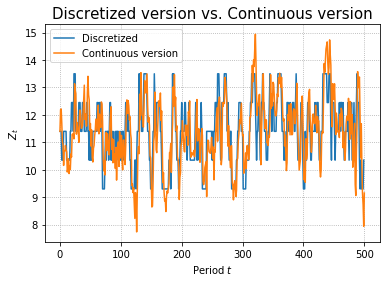

In [106]:
plt.plot(x_vec)
plt.plot(z)
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title('Discretized version vs. Continuous version', fontsize=15)
plt.xlabel(r'Period $t$')
plt.ylabel(r'$Z_t$')
plt.legend(['Discretized', 'Continuous version'])
plt.show()